In [1]:
# Import libraries and dependencies
import os
import pandas as pd
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
from pathlib import Path
import numpy as np

In [2]:
# Load .env enviroment variables
from dotenv import load_dotenv
load_dotenv()

True

In [3]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)


In [4]:
# Format dates as ISO format
start1 = pd.Timestamp("2018-12-10", tz="America/New_York").isoformat()
end1 = pd.Timestamp("2020-01-20", tz="America/New_York").isoformat()
start2 = pd.Timestamp("2020-01-21", tz="America/New_York").isoformat()
today = pd.Timestamp("2021-09-20", tz="America/New_York").isoformat()

In [5]:
# Set the tickers
tickers = ["MRNA", "PFE","INO","SNY","AZN","MRK","NVAX","GSK","JNJ","MDGS"]
#ticker_index = ["XBI"]

In [6]:
# Set timeframe to one day ('1D') for the Alpaca API
timeframe = "1D"

In [7]:
# Get closing prices 
df_portfolio_all = alpaca.get_barset(
    tickers,
    timeframe,
    start = start1,
    end = today,
    limit = 1000
).df


# Display sample data
df_portfolio_all.head(10)


AZN                                     GSK  \
                            open   high      low   close   volume   open   
time                                                                       
2018-12-10 00:00:00-05:00  38.86  38.86  38.1300  38.420  6655389  37.41   
2018-12-11 00:00:00-05:00  39.14  39.31  38.4450  38.660  6024419  38.06   
2018-12-12 00:00:00-05:00  38.91  39.31  38.8900  38.920  3967506  37.76   
2018-12-13 00:00:00-05:00  39.26  39.50  39.0300  39.230  1989476  38.03   
2018-12-14 00:00:00-05:00  39.20  39.21  38.9100  39.160  4203526  37.58   
2018-12-17 00:00:00-05:00  39.20  39.28  38.1650  38.355  4128165  37.45   
2018-12-18 00:00:00-05:00  38.47  38.59  38.0715  38.235  2757740  37.37   
2018-12-19 00:00:00-05:00  38.48  38.53  37.6500  37.960  4067604  39.26   
2018-12-20 00:00:00-05:00  38.91  38.91  37.8600  38.040  4366744  38.30   
2018-12-21 00:00:00-05:00  37.70  38.21  37.4900  37.520  3294398  37.83   

                                                            ...    PFE  \
                             high    low   close    volume  ...   open   
time                                                        ...          
2018-12-10 00:00:00-05:00  37.800  37.16  37.685   4373858  ...  44.14   
2018-12-11 00:00:00-05:00  38.110  37.24  37.360   3447608  ...  44.08   
2018-12-12 00:00:00-05:00  38.160  37.66  37.670   2360025  ...  44.35   
2018-12-13 00:00:00-05:00  38.100  37.67  37.940   2198395  ...  44.46   
2018-12-14 00:00:00-05:00  37.675  37.40  37.615   4120670  ...  44.08   
2018-12-17 00:00:00-05:00  37.515  36.94  37.070   3806938  ...  43.50   
2018-12-18 00:00:00-05:00  37.400  36.87  37.090   4200825  ...  43.47   
2018-12-19 00:00:00-05:00  39.270  37.30  37.410  13709288  ...  42.83   
2018-12-20 00:00:00-05:00  38.620  37.68  37.910   6190728  ...  41.71   
2018-12-21 00:00:00-05:00  38.360  37.57  37.590   4310006  ...  41.64   

                                                               SNY         \
                             high     low   close    volume   open   high   
time                                                                        
2018-12-10 00:00:00-05:00  44.560  43.070  44.405  22466277  44.15  44.38   
2018-12-11 00:00:00-05:00  44.510  43.570  44.020  20020936  44.71  44.72   
2018-12-12 00:00:00-05:00  44.845  44.150  44.170  14819586  45.28  45.56   
2018-12-13 00:00:00-05:00  44.900  44.210  44.550  16251482  44.51  44.89   
2018-12-14 00:00:00-05:00  44.120  43.425  43.845  24085732  44.03  44.27   
2018-12-17 00:00:00-05:00  43.970  42.980  43.100  30524854  43.93  44.05   
2018-12-18 00:00:00-05:00  43.500  42.040  42.400  24825645  43.48  43.51   
2018-12-19 00:00:00-05:00  42.990  41.560  41.970  30307929  43.82  44.05   
2018-12-20 00:00:00-05:00  42.410  41.530  41.960  26909733  43.68  43.74   
2018-12-21 00:00:00-05:00  42.870  41.450  41.950  34505684  42.71  43.15   

                                                    
                               low  close   volume  
time                                                
2018-12-10 00:00:00-05:00  43.5100  44.17  1172644  
2018-12-11 00:00:00-05:00  44.1036  44.34  1295092  
2018-12-12 00:00:00-05:00  45.1400  45.14  1330747  
2018-12-13 00:00:00-05:00  44.3371  44.84  1164531  
2018-12-14 00:00:00-05:00  44.0000  44.07   992662  
2018-12-17 00:00:00-05:00  43.4400  43.58  1165226  
2018-12-18 00:00:00-05:00  43.0800  43.23   901134  
2018-12-19 00:00:00-05:00  43.0900  43.36   878669  
2018-12-20 00:00:00-05:00  43.1400  43.22  1108288  
2018-12-21 00:00:00-05:00  42.4050  42.42  1292248  

[10 rows x 50 columns]

In [8]:
# Create an empty DataFrame for closing prices
df_closing_prices = pd.DataFrame()

# Fetch the closing prices 
#"CVAC","MRNA", "PFE","INO","SNY","AZN","MRK","NVAX","GSK","JNJ","MDGS"
df_closing_prices["MRNA"] = df_portfolio_all["MRNA"]["close"]
df_closing_prices["PFE"] = df_portfolio_all["PFE"]["close"]
df_closing_prices["INO"] = df_portfolio_all["INO"]["close"]
df_closing_prices["SNY"] = df_portfolio_all["SNY"]["close"]
df_closing_prices["AZN"] = df_portfolio_all["AZN"]["close"]
df_closing_prices["MRK"] = df_portfolio_all["MRK"]["close"]
df_closing_prices["NVAX"] = df_portfolio_all["NVAX"]["close"]
df_closing_prices["GSK"] = df_portfolio_all["GSK"]["close"]
df_closing_prices["JNJ"] = df_portfolio_all["JNJ"]["close"]
df_closing_prices["MDGS"] = df_portfolio_all["MDGS"]["close"]

# Drop the time component of the date
df_closing_prices.index = df_closing_prices.index.date

# Display sample data
df_closing_prices.head(10)

MRNA     PFE   INO    SNY     AZN    MRK   NVAX     GSK  \
2018-12-10  18.7577  44.405  5.20  44.17  38.420  77.42  2.130  37.685   
2018-12-11  18.0100  44.020  5.18  44.34  38.660  77.13  2.230  37.360   
2018-12-12  18.7500  44.170  5.30  45.14  38.920  78.02  2.470  37.670   
2018-12-13  18.7600  44.550  5.11  44.84  39.230  79.00  2.290  37.940   
2018-12-14  18.3100  43.845  4.87  44.07  39.160  76.50  2.420  37.615   
2018-12-17  17.0000  43.100  4.73  43.58  38.355  75.22  2.280  37.070   
2018-12-18  16.9000  42.400  4.53  43.23  38.235  74.33  2.165  37.090   
2018-12-19  16.0250  41.970  4.45  43.36  37.960  73.75  2.160  37.410   
2018-12-20  15.5030  41.960  4.25  43.22  38.040  73.48  2.050  37.910   
2018-12-21  14.4350  41.950  3.89  42.42  37.520  72.87  1.910  37.590   

               JNJ    MDGS  
2018-12-10  145.29  3.3252  
2018-12-11  146.53  3.3400  
2018-12-12  147.20  3.4200  
2018-12-13  147.79  3.4700  
2018-12-14  132.86  3.2600  
2018-12-17  129.11  3.2500  
2018-12-18  130.41  3.1400  
2018-12-19  127.63  3.0400  
2018-12-20  128.22  3.0400  
2018-12-21  128.08  2.8600

In [9]:
df_closing_prices.index.name = 'Date'

In [10]:
# Compute daily returns
df_daily_returns = df_closing_prices.pct_change().dropna()
# due to stock split for NVAX on May 10 2019, we have to remove the data on that date so that there's no outliners.
df_daily_returns = df_daily_returns.drop(pd.to_datetime('2019-05-10'))
# Display sample data
df_daily_returns.head()

MRNA       PFE       INO       SNY       AZN       MRK  \
Date                                                                     
2018-12-11 -0.039861 -0.008670 -0.003846  0.003849  0.006247 -0.003746   
2018-12-12  0.041088  0.003408  0.023166  0.018042  0.006725  0.011539   
2018-12-13  0.000533  0.008603 -0.035849 -0.006646  0.007965  0.012561   
2018-12-14 -0.023987 -0.015825 -0.046967 -0.017172 -0.001784 -0.031646   
2018-12-17 -0.071546 -0.016992 -0.028747 -0.011119 -0.020557 -0.016732   

                NVAX       GSK       JNJ      MDGS  
Date                                                
2018-12-11  0.046948 -0.008624  0.008535  0.004451  
2018-12-12  0.107623  0.008298  0.004572  0.023952  
2018-12-13 -0.072874  0.007168  0.004008  0.014620  
2018-12-14  0.056769 -0.008566 -0.101022 -0.060519  
2018-12-17 -0.057851 -0.014489 -0.028225 -0.003067

In [11]:
import hvplot.pandas

In [12]:
# Use hvplot() function to plot data
df_daily_returns.hvplot.line(xlabel="Year", ylabel="Daily Return")

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

In [13]:
# building index - way 1: eaqual weighting
df_closing_prices["sum"] = df_closing_prices.sum(axis=1)

In [14]:
df_index_1 = pd.DataFrame()
df_index_1["price"] = df_closing_prices['sum']/10
df_closing_prices = df_closing_prices.drop(columns=['sum'])

In [15]:
df_index_1.hvplot.line(label = "index_price by equal weighting" ) * df_closing_prices.hvplot.line()

:Overlay
   .Curve.Index_price_by_equal_weighting :Curve   [Date]   (price)
   .NdOverlay.I                          :NdOverlay   [Variable]
      :Curve   [Date]   (value)

In [16]:
# building index - way 2: by market caps
company_info_path = Path("company_info.txt")
company_info = pd.read_csv(
    company_info_path, index_col="Short_code", parse_dates=True, infer_datetime_format=True
)

<AxesSubplot:title={'center':'companies by Vaccine types'}, ylabel='type'>

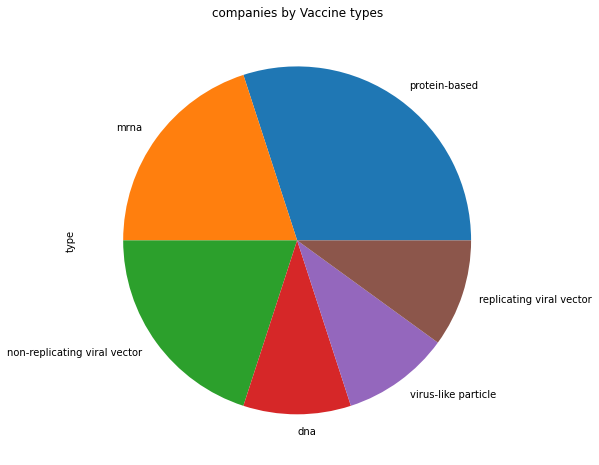

In [17]:
# pie chart by vaccines type
vac_type = pd.DataFrame()
vac_type['type']= company_info['vaccine_type']
vac_type_count = vac_type['type'].value_counts()
vac_type_count.plot(kind='pie',figsize=(8, 8),title='companies by Vaccine types')

In [18]:
# get the weighting by market caps in a new dataframe
df_weighting_by_mktcaps = pd.DataFrame()
toal_mktcaps = company_info.sum()[1]
df_weighting_by_mktcaps['weighting'] =  company_info['market_caps']/toal_mktcaps
df_weighting_by_mktcaps = df_weighting_by_mktcaps.sort_values("weighting",ascending=True)

<AxesSubplot:title={'center':'companies by market caps'}, ylabel='weighting'>

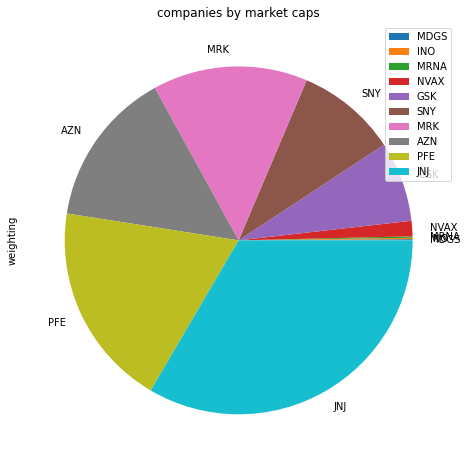

In [19]:
df_weighting_by_mktcaps.plot(kind='pie',y='weighting',figsize=(8, 8),title='companies by market caps')

In [20]:
df_weighting_by_mktcaps.sort_values('weighting',inplace=True)

In [21]:
# PFE,JNJ,MRK,AZN,GSK,SNY will be assigned weighting eaqual to 15% and the rest of the portions will be allocated to the rest by market caps
small_caps_weighting = pd.DataFrame()
small_caps = df_weighting_by_mktcaps.iloc[:-6]
small_caps_total = small_caps['weighting'].sum()
small_caps_weighting ['weighting'] = (small_caps['weighting']/small_caps_total)*0.1

small_caps_weighting

weighting
Short_code           
MDGS         0.006049
INO          0.007250
MRNA         0.007422
NVAX         0.079279

In [22]:
df_index_2 = pd.DataFrame()
df_index_2['index_price'] = (small_caps_weighting.iloc[0]['weighting'] * df_closing_prices['MDGS']
+ small_caps_weighting.iloc[1]['weighting'] * df_closing_prices['INO']
+ small_caps_weighting.iloc[2]['weighting'] * df_closing_prices['MRNA']
+ small_caps_weighting.iloc[3]['weighting'] * df_closing_prices['NVAX']
+ 0.15 * df_closing_prices['GSK']
+ 0.15 * df_closing_prices['SNY']
+ 0.15 * df_closing_prices['PFE']
+ 0.15 * df_closing_prices['JNJ']
+ 0.15 * df_closing_prices['MRK']
+ 0.15 * df_closing_prices['AZN'])


In [23]:
df_index_2.hvplot.line(label = "index_price by market caps" ) * df_closing_prices.hvplot.line()

:Overlay
   .Curve.Index_price_by_market_caps :Curve   [Date]   (index_price)
   .NdOverlay.I                      :NdOverlay   [Variable]
      :Curve   [Date]   (value)

In [24]:
df_index_2.hvplot.line(label = "index_price by market caps" )

:Curve   [Date]   (index_price)

In [25]:
df_index_1.hvplot.line(label = "index_price by equally weighting" )

:Curve   [Date]   (price)

In [26]:
# NBI index
nbi_path = Path("NBI.csv")
nbi_file = pd.read_csv(
    nbi_path, index_col="Date", parse_dates=True, infer_datetime_format=True
)

In [27]:
nbi = pd.DataFrame()
nbi['nbi_price'] = nbi_file['Close']

In [28]:
nbi.hvplot.line(label = "NBI" )

:Curve   [Date]   (nbi_price)

In [29]:
# convert to daily returns so to make comparable
df_index_1_returns = df_index_1.pct_change().dropna()
df_index_2_returns = df_index_2.pct_change().dropna()
nbi_returns = nbi.pct_change().dropna()

In [30]:
nbi_returns.hvplot.line(label ='NBI') * df_index_1_returns.hvplot.line(label = "vaccine index by equal weights") * df_index_2_returns.hvplot.line(label = "vaccine index by mkt caps")

:Overlay
   .Curve.NBI                            :Curve   [Date]   (nbi_price)
   .Curve.Vaccine_index_by_equal_weights :Curve   [Date]   (price)
   .Curve.Vaccine_index_by_mkt_caps      :Curve   [Date]   (index_price)

In [31]:
# statistics Analysis
# from above graph, we can see the vols etc increased since Mar 2020. So we will split into two data setsto do the analysis
df_index_1_returns.index = pd.to_datetime(df_index_1_returns.index)
df_index_1_returns_covid=df_index_1_returns['2020-03-01':]
df_index_1_returns_beforecovid=df_index_1_returns[:'2020-03-01']

df_index_2_returns.index = pd.to_datetime(df_index_1_returns.index)
df_index_2_returns_covid=df_index_2_returns['2020-03-01':]
df_index_2_returns_beforecovid=df_index_2_returns[:'2020-03-01']

nbi_returns_covid=nbi_returns['2020-03-01':]
nbi_returns_beforecovid=nbi_returns[:'2020-03-01']

In [32]:
joined_returns_covid = pd.concat(
    [df_index_1_returns_covid, df_index_2_returns_covid, nbi_returns_covid], axis="columns", join="inner"
)
joined_returns_covid.columns = ['returns of index by equally weighting','returns of index by market caps','returns of NBI index']

joined_returns_beforecovid = pd.concat(
    [df_index_1_returns_beforecovid, df_index_2_returns_beforecovid, nbi_returns_beforecovid], axis="columns", join="inner"
)
joined_returns_beforecovid.columns = ['returns of index by equally weighting','returns of index by market caps','returns of NBI index']


In [33]:
joined_returns_covid.describe()

returns of index by equally weighting  returns of index by market caps  \
count                             392.000000                       392.000000   
mean                                0.002753                         0.001163   
std                                 0.025007                         0.017955   
min                                -0.064706                        -0.074191   
25%                                -0.013339                        -0.008255   
50%                                 0.003085                         0.000888   
75%                                 0.017080                         0.011175   
max                                 0.127098                         0.074826   

       returns of NBI index  
count            392.000000  
mean               0.001223  
std                0.019078  
min               -0.096598  
25%               -0.009265  
50%                0.001724  
75%                0.010943  
max                0.070580

In [34]:
joined_returns_beforecovid.describe()

returns of index by equally weighting  returns of index by market caps  \
count                             306.000000                     3.060000e+02   
mean                                0.000086                    -1.604716e-07   
std                                 0.009061                     8.959302e-03   
min                                -0.047449                    -4.868608e-02   
25%                                -0.004562                    -3.931930e-03   
50%                                 0.000386                     4.434303e-04   
75%                                 0.005666                     5.325922e-03   
max                                 0.027506                     3.178127e-02   

       returns of NBI index  
count            306.000000  
mean               0.000392  
std                0.013478  
min               -0.041255  
25%               -0.007678  
50%                0.000949  
75%                0.007990  
max                0.061664

<AxesSubplot:ylabel='Density'>

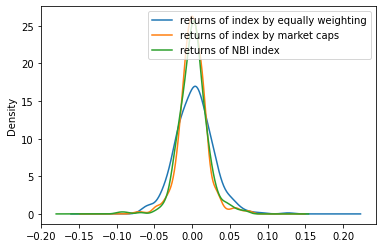

In [35]:
joined_returns_covid.plot.density()

<AxesSubplot:ylabel='Density'>

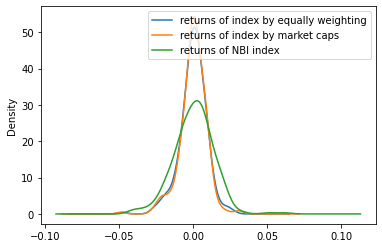

In [36]:
joined_returns_beforecovid.plot.density()

In [37]:
# excess returns
excess_returns_beforecovid = joined_returns_beforecovid.mean()
excess_returns_beforecovid

returns of index by equally weighting    8.623482e-05
returns of index by market caps         -1.604716e-07
returns of NBI index                     3.915309e-04
dtype: float64

In [38]:
excess_returns_covid = joined_returns_covid.mean()
excess_returns_covid

returns of index by equally weighting    0.002753
returns of index by market caps          0.001163
returns of NBI index                     0.001223
dtype: float64

In [39]:
#  Sharpe Ratio
sharpe_ratios_beforecovid = (joined_returns_beforecovid.mean() * 252) / (joined_returns_beforecovid.std() * np.sqrt(252))
sharpe_ratios_beforecovid

returns of index by equally weighting    0.151082
returns of index by market caps         -0.000284
returns of NBI index                     0.461148
dtype: float64

In [40]:
sharpe_ratios_covid = (joined_returns_covid.mean() * 252) / (joined_returns_covid.std() * np.sqrt(252))
sharpe_ratios_covid

returns of index by equally weighting    1.747852
returns of index by market caps          1.028416
returns of NBI index                     1.017953
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios during covid times'}>

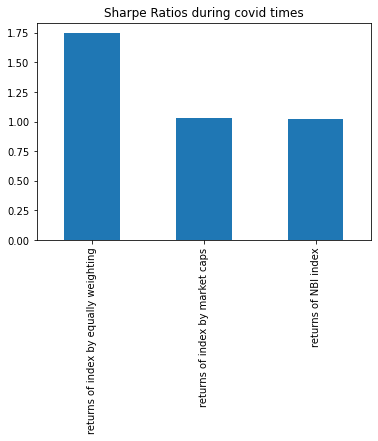

In [41]:
sharpe_ratios_covid.plot(kind="bar", title="Sharpe Ratios during covid times",rot=90)

<AxesSubplot:title={'center':'Sharpe Ratios before covid '}>

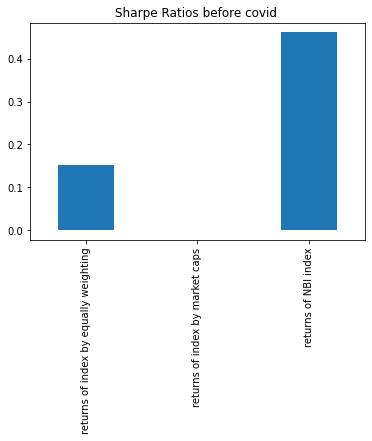

In [42]:
sharpe_ratios_beforecovid.plot(kind="bar", title="Sharpe Ratios before covid ",rot=90)
# returns of index by market caps has near 0 sharpe ratio

In [70]:
#beta
variance_beforecovid_index1 = joined_returns_beforecovid['returns of index by equally weighting'].var()
variance_beforecovid_index2 = joined_returns_beforecovid['returns of index by market caps'].var()
variance_covid_index1 = joined_returns_covid['returns of index by equally weighting'].var()
variance_covid_index2 = joined_returns_covid['returns of index by market caps'].var()
# note covariance with NBI here. you can use sp500 or others later on if you want
covariance_beforecovid_index1 = joined_returns_beforecovid['returns of index by equally weighting'].cov(joined_returns_beforecovid['returns of NBI index'])
covariance_beforecovid_index2 = joined_returns_beforecovid['returns of index by market caps'].cov(joined_returns_beforecovid['returns of NBI index'])
covariance_covid_index1 = joined_returns_covid['returns of index by equally weighting'].cov(joined_returns_covid['returns of NBI index'])
covariance_covid_index2 = joined_returns_covid['returns of index by market caps'].cov(joined_returns_covid['returns of NBI index'])

In [71]:
#equally weighted index's deta: before covid 
beta_beforecovid_index1=covariance_beforecovid_index1 / variance_beforecovid_index1
beta_beforecovid_index1

0.8947498852002007

In [72]:
# index by market caps - beta: before covid
beta_beforecovid_index2=covariance_beforecovid_index2 / variance_beforecovid_index2
beta_beforecovid_index2

0.850118569396953

In [73]:
#  during covid
beta_covid_index1=covariance_covid_index1 / variance_covid_index1
beta_covid_index1

0.5232597699248238

In [74]:
beta_covid_index2=covariance_covid_index2 / variance_covid_index2
beta_covid_index2

0.7982254035645393

In [75]:
excess_returns_beforecovid

returns of index by equally weighting    8.623482e-05
returns of index by market caps         -1.604716e-07
returns of NBI index                     3.915309e-04
dtype: float64

In [76]:
#alpha: Alpha = R – Rf – beta (Rm-Rf); which assume Rf=0 here. This is to measure passive returns
Alpha_beforecovid_index1 = excess_returns_beforecovid['returns of index by equally weighting'] - beta_beforecovid_index1*joined_returns_beforecovid['returns of NBI index'].mean()
Alpha_beforecovid_index1

-0.00026408743908597654

In [77]:
Alpha_beforecovid_index2 = excess_returns_beforecovid['returns of index by market caps'] - beta_beforecovid_index2*joined_returns_beforecovid['returns of NBI index'].mean()
Alpha_beforecovid_index2

-0.0003330081938654281

In [78]:
Alpha_covid_index1 = excess_returns_beforecovid['returns of index by equally weighting'] - beta_covid_index1*joined_returns_covid['returns of NBI index'].mean()
Alpha_covid_index1

-0.0005539255880441859

In [79]:
Alpha_covid_index2 = excess_returns_covid['returns of index by market caps'] - beta_covid_index2*joined_returns_covid['returns of NBI index'].mean()
Alpha_covid_index2

0.00018662300479470502

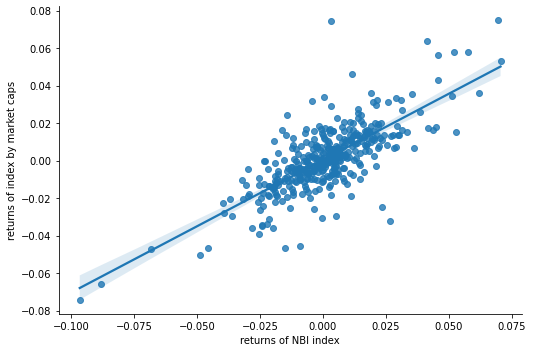

In [80]:
# correlation between our index with NBI
import seaborn as sns
#covid times

sns.lmplot(x="returns of NBI index", y="returns of index by market caps", data=joined_returns_covid, aspect=1.5, fit_reg=True)

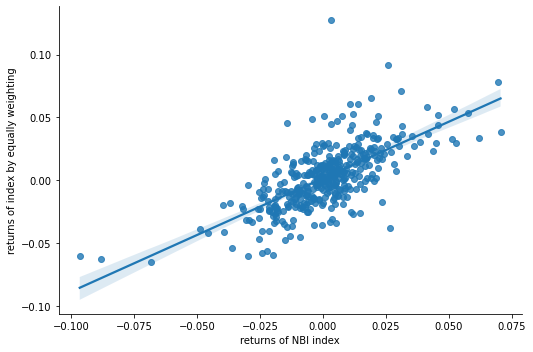

In [81]:
sns.lmplot(x="returns of NBI index", y="returns of index by equally weighting", data=joined_returns_covid, aspect=1.5, fit_reg=True)

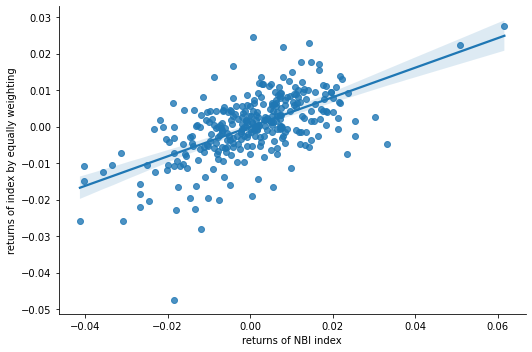

In [82]:
# before covid
sns.lmplot(x="returns of NBI index", y="returns of index by equally weighting", data=joined_returns_beforecovid, aspect=1.5, fit_reg=True)

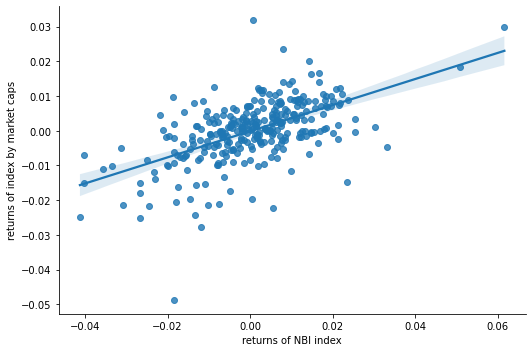

In [83]:

sns.lmplot(x="returns of NBI index", y="returns of index by market caps", data=joined_returns_beforecovid, aspect=1.5, fit_reg=True)

In [84]:
# forecasting
?MCSimulation

Init signature:
MCSimulation(
    portfolio_data,
    weights='',
    num_simulation=1000,
    num_trading_days=252,
)
Docstring:     
A Python class for runnning Monte Carlo simulation on portfolio price data. 

...

Attributes
----------
portfolio_data : pandas.DataFrame
    portfolio dataframe
weights: list(float)
    portfolio investment breakdown
nSim: int
    number of samples in simulation
nTrading: int
    number of trading days to simulate
simulated_return : pandas.DataFrame
    Simulated data from Monte Carlo
confidence_interval : pandas.Series
    the 95% confidence intervals for simulated final cumulative returns
    
Init docstring:
Constructs all the necessary attributes for the MCSimulation object.
Parameters
----------
portfolio_data: pandas.DataFrame
    DataFrame containing stock price information from Alpaca API
weights: list(float)
    A list fractions representing percentage of total investment per stock. DEFAULT: Equal distribution
num_simulation: int
    Number o

In [85]:
# future three year's forecasting on the new index based on the index data since 2018 - euqally weighting
MC_threeyear = MCSimulation(
    portfolio_data = df_portfolio_all,
    weights = [0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1],
    num_simulation = 500,
    num_trading_days = 252*3
)
# Printing the simulation input data
MC_threeyear.portfolio_data.head()

AZN                                              \
                            open   high     low  close   volume daily_return   
time                                                                           
2018-12-10 00:00:00-05:00  38.86  38.86  38.130  38.42  6655389          NaN   
2018-12-11 00:00:00-05:00  39.14  39.31  38.445  38.66  6024419     0.006247   
2018-12-12 00:00:00-05:00  38.91  39.31  38.890  38.92  3967506     0.006725   
2018-12-13 00:00:00-05:00  39.26  39.50  39.030  39.23  1989476     0.007965   
2018-12-14 00:00:00-05:00  39.20  39.21  38.910  39.16  4203526    -0.001784   

                             GSK                         ...     PFE          \
                            open    high    low   close  ...     low   close   
time                                                     ...                   
2018-12-10 00:00:00-05:00  37.41  37.800  37.16  37.685  ...  43.070  44.405   
2018-12-11 00:00:00-05:00  38.06  38.110  37.24  37.360  ...  43.570  44.020   
2018-12-12 00:00:00-05:00  37.76  38.160  37.66  37.670  ...  44.150  44.170   
2018-12-13 00:00:00-05:00  38.03  38.100  37.67  37.940  ...  44.210  44.550   
2018-12-14 00:00:00-05:00  37.58  37.675  37.40  37.615  ...  43.425  43.845   

                                                    SNY                  \
                             volume daily_return   open   high      low   
time                                                                      
2018-12-10 00:00:00-05:00  22466277          NaN  44.15  44.38  43.5100   
2018-12-11 00:00:00-05:00  20020936    -0.008670  44.71  44.72  44.1036   
2018-12-12 00:00:00-05:00  14819586     0.003408  45.28  45.56  45.1400   
2018-12-13 00:00:00-05:00  16251482     0.008603  44.51  44.89  44.3371   
2018-12-14 00:00:00-05:00  24085732    -0.015825  44.03  44.27  44.0000   

                                                        
                           close   volume daily_return  
time                                                    
2018-12-10 00:00:00-05:00  44.17  1172644          NaN  
2018-12-11 00:00:00-05:00  44.34  1295092     0.003849  
2018-12-12 00:00:00-05:00  45.14  1330747     0.018042  
2018-12-13 00:00:00-05:00  44.84  1164531    -0.006646  
2018-12-14 00:00:00-05:00  44.07   992662    -0.017172  

[5 rows x 60 columns]

In [86]:
MC_threeyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\yauhe\GitHub\project1\MCForecastTools.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

0           1         2          3          4          5    \
0    1.000000    1.000000  1.000000   1.000000   1.000000   1.000000   
1    0.974022    1.020249  1.010392   1.013984   1.024732   0.974868   
2    1.006213    0.880581  0.952652   0.981167   1.124166   1.068774   
3    1.026784    0.888614  0.970246   1.090652   1.143086   1.081665   
4    1.032780    0.892422  0.985740   1.068217   1.118536   1.041894   
..        ...         ...       ...        ...        ...        ...   
752  0.355004  122.024794  0.517519  22.516633  50.491969  13.705081   
753  0.390331  140.453098  0.513690  24.835548  50.145028  14.246059   
754  0.400615  133.005753  0.587867  23.398532  44.192586  14.858572   
755  0.436728  138.035027  0.576356  24.262163  47.718260  14.042881   
756  0.422779  142.388596  0.607307  26.157125  47.564778  14.113021   

           6          7          8         9    ...        490       491  \
0     1.000000   1.000000   1.000000  1.000000  ...   1.000000  1.000000   
1     1.099643   1.009010   1.010415  0.930046  ...   0.997696  1.056991   
2     1.085305   1.030397   1.008484  1.006567  ...   1.095526  0.992051   
3     0.903021   1.010598   1.053054  0.970270  ...   1.019736  1.020638   
4     0.864139   0.999015   1.007627  0.881353  ...   1.056730  1.018206   
..         ...        ...        ...       ...  ...        ...       ...   
752  67.305666  18.066591  22.851976  2.202586  ...  11.600332  0.965857   
753  68.556255  19.752335  24.942911  2.256710  ...  12.561256  1.039656   
754  71.358931  18.283827  26.090881  2.343608  ...  13.854538  1.115626   
755  70.129703  16.084590  24.564701  2.375991  ...  12.805843  1.044487   
756  75.122179  16.390021  26.247870  2.386229  ...  12.872833  1.062086   

          492         493       494       495        496        497       498  \
0    1.000000    1.000000  1.000000  1.000000   1.000000   1.000000  1.000000   
1    1.096237    0.977106  0.957534  1.012394   1.015086   0.935754  1.097682   
2    1.197504    0.957489  0.898993  1.067121   0.992229   0.865237  0.995787   
3    1.208084    0.955705  0.845206  1.002244   1.095499   0.904178  1.067028   
4    1.281558    1.076326  0.821089  1.030278   0.970452   0.847140  1.095797   
..        ...         ...       ...       ...        ...        ...       ...   
752  2.844527  186.888417  0.295442  1.808916  17.206204  76.116743  1.344607   
753  2.764870  193.926104  0.277663  1.909067  16.397278  70.282163  1.183235   
754  3.152553  177.311442  0.260592  2.026327  16.822765  73.112653  1.220567   
755  2.877305  168.905075  0.253515  2.161317  16.488171  77.945435  1.185558   
756  3.121274  164.909176  0.300211  2.191468  17.707643  85.306985  1.280254   

          499  
0    1.000000  
1    1.087785  
2    1.146486  
3    1.028252  
4    1.034679  
..        ...  
752  6.797301  
753  6.621701  
754  7.045805  
755  7.887237  
756  8.013646  

[757 rows x 500 columns]

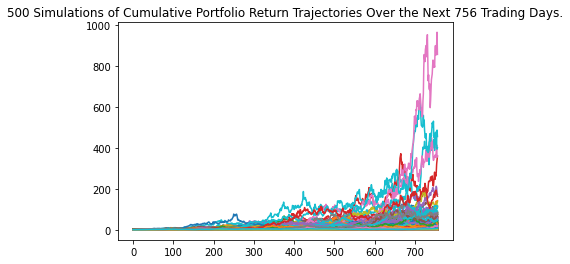

In [87]:
# Plot simulation outcomes
line_plot = MC_threeyear.plot_simulation()

# Save the plot for future usage
line_plot.get_figure().savefig("MC_threeyear_sim_plot.png", bbox_inches="tight")

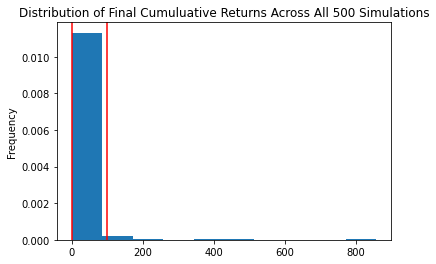

In [88]:
 # Plot probability distribution and confidence intervals
dist_plot = MC_threeyear.plot_distribution()

# Save the plot for future usage
dist_plot.get_figure().savefig('MC_threeyear_dist_plot.png',bbox_inches='tight')

In [89]:
tbl = MC_threeyear.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean             18.959667
std              56.118618
min               0.030339
25%               1.236479
50%               4.325215
75%              15.110070
max             857.082211
95% CI Lower      0.147966
95% CI Upper    100.422553
Name: 756, dtype: float64


In [90]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $10,000 investments in Coca-Cola and Microsoft stocks
ci_lower = round(tbl[8]*10000,2)
ci_upper = round(tbl[9]*10000,2)

# Print results
print(f"There is a 95% chance that an initial investment of $10,000 in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $10,000 in the portfolio over the next 5 years will end within in the range of $1479.66 and $1004225.53


In [91]:
# future three year's forecasting on the new index based on the index data since 2018 - weight in market caps
MC_threeyear_by_mktcaps = MCSimulation(
    portfolio_data = df_portfolio_all,
    weights = [0.15,0.15,0.007250,0.15,0.006049,0.15,0.007422,0.079279,0.15,0.15],
    num_simulation = 500,
    num_trading_days = 252*3
)
# Printing the simulation input data
MC_threeyear_by_mktcaps.portfolio_data.head()

AZN                                              \
                            open   high     low  close   volume daily_return   
time                                                                           
2018-12-10 00:00:00-05:00  38.86  38.86  38.130  38.42  6655389          NaN   
2018-12-11 00:00:00-05:00  39.14  39.31  38.445  38.66  6024419     0.006247   
2018-12-12 00:00:00-05:00  38.91  39.31  38.890  38.92  3967506     0.006725   
2018-12-13 00:00:00-05:00  39.26  39.50  39.030  39.23  1989476     0.007965   
2018-12-14 00:00:00-05:00  39.20  39.21  38.910  39.16  4203526    -0.001784   

                             GSK                         ...     PFE          \
                            open    high    low   close  ...     low   close   
time                                                     ...                   
2018-12-10 00:00:00-05:00  37.41  37.800  37.16  37.685  ...  43.070  44.405   
2018-12-11 00:00:00-05:00  38.06  38.110  37.24  37.360  ...  43.570  44.020   
2018-12-12 00:00:00-05:00  37.76  38.160  37.66  37.670  ...  44.150  44.170   
2018-12-13 00:00:00-05:00  38.03  38.100  37.67  37.940  ...  44.210  44.550   
2018-12-14 00:00:00-05:00  37.58  37.675  37.40  37.615  ...  43.425  43.845   

                                                    SNY                  \
                             volume daily_return   open   high      low   
time                                                                      
2018-12-10 00:00:00-05:00  22466277          NaN  44.15  44.38  43.5100   
2018-12-11 00:00:00-05:00  20020936    -0.008670  44.71  44.72  44.1036   
2018-12-12 00:00:00-05:00  14819586     0.003408  45.28  45.56  45.1400   
2018-12-13 00:00:00-05:00  16251482     0.008603  44.51  44.89  44.3371   
2018-12-14 00:00:00-05:00  24085732    -0.015825  44.03  44.27  44.0000   

                                                        
                           close   volume daily_return  
time                                                    
2018-12-10 00:00:00-05:00  44.17  1172644          NaN  
2018-12-11 00:00:00-05:00  44.34  1295092     0.003849  
2018-12-12 00:00:00-05:00  45.14  1330747     0.018042  
2018-12-13 00:00:00-05:00  44.84  1164531    -0.006646  
2018-12-14 00:00:00-05:00  44.07   992662    -0.017172  

[5 rows x 60 columns]

In [92]:
MC_threeyear_by_mktcaps.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\yauhe\GitHub\project1\MCForecastTools.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

0         1         2         3         4          5         6    \
0    1.000000  1.000000  1.000000  1.000000  1.000000   1.000000  1.000000   
1    1.056299  0.896331  0.955524  1.076932  0.989877   0.931652  1.034650   
2    1.057844  0.820274  0.956874  1.024026  1.012381   0.952453  1.030464   
3    1.041673  0.770668  0.936708  1.073764  1.094925   0.967668  1.107414   
4    1.014813  0.809466  0.903880  1.090984  1.049121   1.056625  1.125037   
..        ...       ...       ...       ...       ...        ...       ...   
752  3.565631  4.740211  0.040183  0.226604  1.043496  11.260492  3.869343   
753  3.253846  4.736154  0.042960  0.224161  0.984118  11.319699  4.071559   
754  3.145742  4.408283  0.043241  0.227099  1.007775  12.106715  4.177911   
755  3.192783  4.104677  0.042634  0.209260  1.067100  12.313080  4.122443   
756  3.272075  4.026293  0.041492  0.201567  0.920684  11.339898  3.802592   

          7           8          9    ...       490       491       492  \
0    1.000000    1.000000   1.000000  ...  1.000000  1.000000  1.000000   
1    1.036525    1.050845   1.117816  ...  0.927907  0.994419  0.951973   
2    1.032223    1.051964   1.089905  ...  0.997082  1.003447  1.018180   
3    1.124873    0.949207   1.184995  ...  1.046605  0.961404  1.004257   
4    1.129468    0.890492   1.211435  ...  1.127750  1.013225  0.998190   
..        ...         ...        ...  ...       ...       ...       ...   
752  2.402805  103.353183  15.723170  ...  1.038559  3.229292  0.724580   
753  2.209854  104.499336  17.036483  ...  1.007449  3.372534  0.772394   
754  2.238602  102.841310  17.407916  ...  0.974429  3.404150  0.784977   
755  2.125528  102.589162  17.828506  ...  1.011703  3.636121  0.737891   
756  2.212995  109.933785  17.464584  ...  0.994312  3.897357  0.724684   

          493       494       495       496        497       498       499  
0    1.000000  1.000000  1.000000  1.000000   1.000000  1.000000  1.000000  
1    1.001186  0.960653  0.932593  0.967557   0.978926  1.084062  1.042397  
2    1.061430  0.933079  0.989006  0.972217   1.053002  1.147439  1.064091  
3    1.097744  0.983634  1.020707  0.988662   1.079165  1.162752  1.087022  
4    1.137364  1.003951  1.021780  0.984706   1.089307  1.168689  1.143754  
..        ...       ...       ...       ...        ...       ...       ...  
752  1.409591  1.036900  1.153830  1.943043  23.667718  1.775298  4.139701  
753  1.265037  1.010310  1.163303  2.020306  24.573412  1.813202  4.368475  
754  1.258408  1.099261  1.110507  2.191017  26.619510  1.668195  4.378680  
755  1.266703  1.167667  1.102698  2.224051  25.808835  1.705142  4.347018  
756  1.350707  1.200660  1.101769  2.484727  24.081607  1.789114  4.377790  

[757 rows x 500 columns]

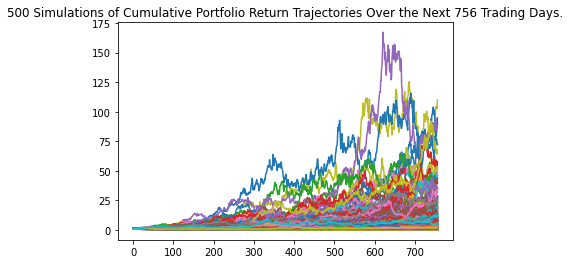

In [93]:
# Plot simulation outcomes
line_plot_by_mktcaps = MC_threeyear_by_mktcaps.plot_simulation()

# Save the plot for future usage
line_plot_by_mktcaps.get_figure().savefig("MC_threeyear_sim_plot_by_mktcaps.png", bbox_inches="tight")

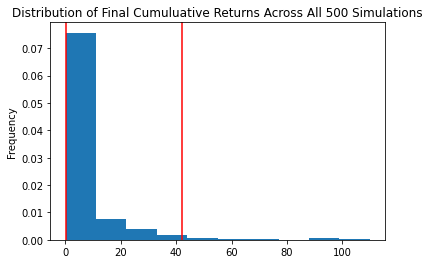

In [94]:
 # Plot probability distribution and confidence intervals
dist_plot_by_mktcaps = MC_threeyear_by_mktcaps.plot_distribution()

# Save the plot for future usage
dist_plot_by_mktcaps.get_figure().savefig('MC_threeyear_dist_plot_by_mktcap.png',bbox_inches='tight')

In [95]:
tbl_by_mktcaps = MC_threeyear_by_mktcaps.summarize_cumulative_return()

# Print summary statistics
print(tbl_by_mktcaps)

count           500.000000
mean              7.065299
std              12.539353
min               0.019504
25%               1.035587
50%               2.679570
75%               7.135848
max             109.933785
95% CI Lower      0.152621
95% CI Upper     42.135356
Name: 756, dtype: float64


In [96]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $10,000 investments in Coca-Cola and Microsoft stocks
ci_lower = round(tbl_by_mktcaps[8]*10000,2)
ci_upper = round(tbl_by_mktcaps[9]*10000,2)

# Print results
print(f"There is a 95% chance that an initial investment of $10,000 in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $10,000 in the portfolio over the next 5 years will end within in the range of $1526.21 and $421353.56
